In [1]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot

In [2]:
# real_data = pd.read_csv("test_datasets/real_data_adult.csv", index_col=0)
# print(f"Test dataset has {real_data.shape[0]} instances with {real_data.shape[1]} features")

real_data = pd.read_csv("test_datasets/chapter_4.csv")
real_data.drop(columns=['primary_icd9_code'], inplace=True)
print(f"Test dataset has {real_data.shape[0]} instances with {real_data.shape[1]} features")


Test dataset has 217 instances with 12 features


In [3]:
real_data.head(-1)

,gender,age,ethnicity,admission_type,primary_icd9_label,num_of_icd9_codes,hospital_expire_flag,hospital_stay_hours,BMI,Hemoglobine,Hematocrit,WBC
0,M,51,WHITE,EMERGENCY,Other disease of the blood,26,False,517.0,41.582258,8.452632,23.619048,1.500000
1,F,88,WHITE,EMERGENCY,Other disease of the blood,10,False,236.0,33.600197,8.700000,25.200000,0.900000
2,M,29,WHITE,EMERGENCY,Other disease of the blood,2,False,106.0,33.600197,8.873893,26.199079,11.785775
3,F,85,WHITE,EMERGENCY,Anemia,16,False,42.0,33.600197,8.200000,25.000000,6.400000
4,M,76,WHITE,EMERGENCY,Anemia,16,False,87.0,33.600197,7.700000,25.300000,7.900000
...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,38,WHITE,EMERGENCY,Other disease of the blood,22,True,2465.0,33.600197,8.873893,26.199079,11.785775
212,M,65,BLACK/AFRICAN AMERICAN,EMERGENCY,Other disease of the blood,24,False,186.0,33.600197,7.100000,21.900000,21.150000
213,F,78,BLACK/AFRICAN AMERICAN,EMERGENCY,Coagulation/hemorrhagic,18,False,262.0,33.600197,8.633333,26.883333,10.433333
214,F,55,BLACK/AFRICAN AMERICAN,EMERGENCY,Other disease of the blood,22,False,2013.0,33.600197,9.075000,27.925000,5.250000


**Creation of Meta data**

Meta data are needed to evaluate the generated synthetic data

In [4]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

Auto detected data:



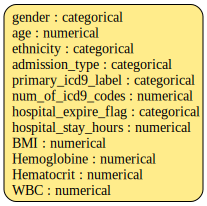

In [5]:
print('Auto detected data:\n')
metadata.visualize()

In [12]:
# metadata.update_column(
#     column_name='initial_diagnosis',
#     sdtype='categorical',
# )

In [6]:
metadata.validate()
metadata.validate_data(data=real_data)

In [8]:
metadata.save_to_json('test_datasets/metadata_chapter_4.json')

In [9]:
# in the future, we can reload the metadata object from the file
metadata = SingleTableMetadata.load_from_json('test_datasets/metadata_chapter_4.json')

In [10]:
synthetic_data = pd.read_csv("test_datasets/syn_data_chapter_4.csv", index_col=0)
print(f"Synthetic dataset has {synthetic_data.shape[0]} instances with {synthetic_data.shape[1]} features")

Synthetic dataset has 217 instances with 12 features


In [11]:
synthetic_data.head()

,gender,age,ethnicity,admission_type,primary_icd9_label,num_of_icd9_codes,hospital_expire_flag,hospital_stay_hours,BMI,Hemoglobine,Hematocrit,WBC
0,M,52,WHITE,EMERGENCY,Other disease of the blood,17,False,289.812303,13.248336,13.240668,25.060606,19.364552
1,M,43,WHITE,EMERGENCY,Anemia,6,False,-57.245888,32.706534,10.107336,25.757634,21.539489
2,F,72,WHITE,EMERGENCY,Anemia,7,False,195.043047,7.697783,8.200341,25.220795,16.194215
3,M,89,WHITE,EMERGENCY,Other disease of the blood,13,False,760.375349,31.507931,8.575220,26.335406,21.402604
4,M,66,WHITE,EMERGENCY,Other disease of the blood,13,False,487.908238,32.289631,8.722646,18.483517,19.109902


In [12]:
diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...
(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

Diagnostic Results:

SUCCESS:
✓ Over 90% of the synthetic rows are not copies of the real data

! The synthetic data is missing more than 10% of the categories present in the real data
! The synthetic data is missing more than 10% of the numerical ranges present in the real data
! More than 10% the synthetic data does not follow the min/max boundaries set by the real data


In [13]:
quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 66/66 [00:00<00:00, 84.49it/s]

Overall Quality Score: 63.51%

Properties:
- Column Shapes: 67.01%
- Column Pair Trends: 60.0%


In [14]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,gender,TVComplement,0.562212
1,age,KSComplement,0.728111
2,ethnicity,TVComplement,0.668203
3,admission_type,TVComplement,0.953917
4,primary_icd9_label,TVComplement,0.668203
5,num_of_icd9_codes,KSComplement,0.898618
6,hospital_expire_flag,TVComplement,0.976959
7,hospital_stay_hours,KSComplement,0.769585
8,BMI,KSComplement,0.359447
9,Hemoglobine,KSComplement,0.603687


In [15]:
for column in real_data.columns:
    # Generate the plot for the current column
    fig = get_column_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        column_name=column,
        metadata=metadata
    )
    
    fig.show()

In [17]:
pairs = [['gender', 'age'], ['admission_type', 'hospital_stay_hours']]

for p in pairs:
    fig = get_column_pair_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        column_names=p,
        metadata=metadata
    )

    fig.show()